# **Loading CIFAR-10 data**

In [1]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


# **Preprocess the data**

In [2]:
x_train = x_train.astype("float32") / 255.0 # Normalize pixel values to 0-1
x_test = x_test.astype("float32") / 255.0   # Normalize pixel values to 0-1

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)       # One-hot encode labels
y_test = to_categorical(y_test, 10)         # One-hot encode labels

# **Build the CNN model**

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation = "relu", input_shape = (32, 32, 3)), # Convolutional layer
    MaxPooling2D((2, 2)),                                               # MaxPooling layer
    Conv2D(64, (3, 3), activation = "relu" ),                           # Second convolutional layer
    MaxPooling2D((2, 2)),                                               # Second pooling layer
    Conv2D(128, (3, 3), activation = "relu" ),                          # Third convolutional layer
    Flatten(),                                                          # Flatten layer
    Dense(128, activation = "relu"),                                    # Fully connected layer
    Dropout(0.5),                                                       # Dropout for regulaization
    Dense(10, activation = "softmax")                                   # output layer (10 classes)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Compile the model**

In [4]:
model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

# **Train the model**

In [5]:
model.fit(x_train, y_train, epochs = 10, batch_size = 64, validation_split = 0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.2843 - loss: 1.9268 - val_accuracy: 0.5177 - val_loss: 1.3423
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4976 - loss: 1.4007 - val_accuracy: 0.5827 - val_loss: 1.1875
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5690 - loss: 1.2214 - val_accuracy: 0.6337 - val_loss: 1.0530
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6163 - loss: 1.1027 - val_accuracy: 0.6478 - val_loss: 1.0003
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6533 - loss: 0.9947 - val_accuracy: 0.6622 - val_loss: 0.9450
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6787 - loss: 0.9277 - val_accuracy: 0.6855 - val_loss: 0.9053
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7029 - loss: 0.8581 - val_accuracy: 0.6689 - val_loss: 0.9498
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7177 - loss: 0.8136 - val_accuracy: 0.

# **Evaluate the model**

In [6]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 2)
print(f"Test Accuracy : {test_accuracy:.2f}")
print(f"Test Loss : {test_loss:.2f}")

313/313 - 1s - 3ms/step - accuracy: 0.7139 - loss: 0.8452
Test Accuracy : 0.71
Test Loss : 0.85


# **Predict on a Sample**

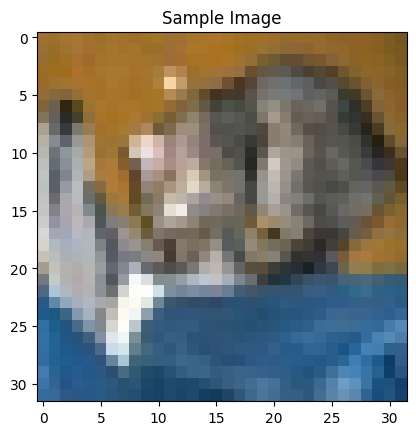

In [7]:
# Choosing a sample image from the test set

import matplotlib.pyplot as plt

sample_image = x_test[0]
plt.imshow(sample_image)
plt.title("Sample Image")
plt.show()

In [8]:
# Make a prediction

import numpy as np

prediction = model.predict(np.expand_dims(sample_image, axis = 0))
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
predicted_class = classes[np.argmax(prediction)]
print(f"Predicted Class : {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
Predicted Class : cat


# **More Predctions**

In [9]:
x_test.shape

(10000, 32, 32, 3)

## 01

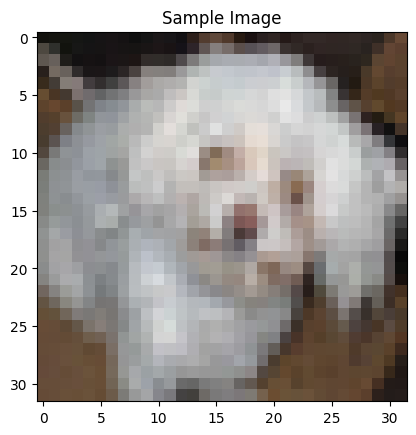

In [10]:
# Choosing a sample image from the test set

import matplotlib.pyplot as plt

sample_image = x_test[1000]
plt.imshow(sample_image)
plt.title("Sample Image")
plt.show()

In [11]:
# Make a prediction

import numpy as np

prediction = model.predict(np.expand_dims(sample_image, axis = 0))
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
predicted_class = classes[np.argmax(prediction)]
print(f"Predicted Class : {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Class : dog


## 02

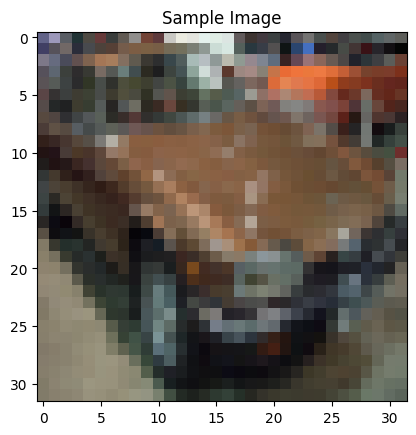

In [12]:
# Choosing a sample image from the test set

import matplotlib.pyplot as plt

sample_image = x_test[2000]
plt.imshow(sample_image)
plt.title("Sample Image")
plt.show()

In [13]:
# Make a prediction

import numpy as np

prediction = model.predict(np.expand_dims(sample_image, axis = 0))
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
predicted_class = classes[np.argmax(prediction)]
print(f"Predicted Class : {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class : frog


## 03

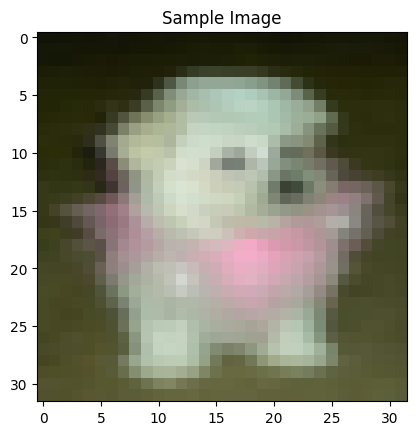

In [14]:
# Choosing a sample image from the test set

import matplotlib.pyplot as plt

sample_image = x_test[3000]
plt.imshow(sample_image)
plt.title("Sample Image")
plt.show()

In [15]:
# Make a prediction

import numpy as np

prediction = model.predict(np.expand_dims(sample_image, axis = 0))
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
predicted_class = classes[np.argmax(prediction)]
print(f"Predicted Class : {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Class : dog


## 04

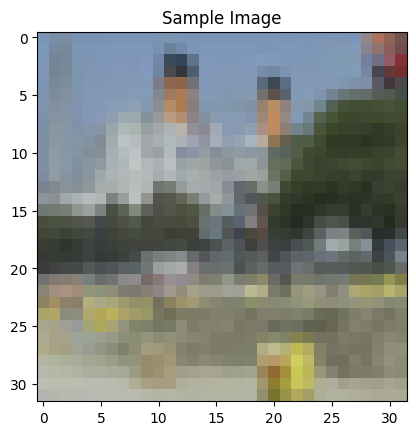

In [16]:
# Choosing a sample image from the test set

import matplotlib.pyplot as plt

sample_image = x_test[4000]
plt.imshow(sample_image)
plt.title("Sample Image")
plt.show()

In [17]:
# Make a prediction

import numpy as np

prediction = model.predict(np.expand_dims(sample_image, axis = 0))
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
predicted_class = classes[np.argmax(prediction)]
print(f"Predicted Class : {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Class : deer


## 05

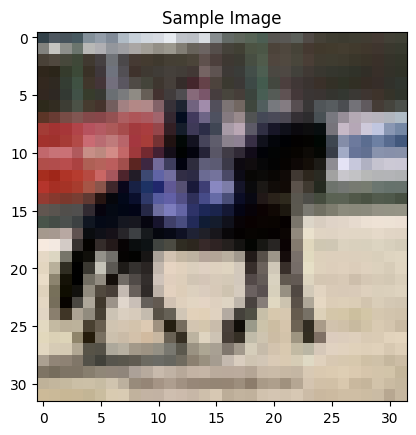

In [18]:
# Choosing a sample image from the test set

import matplotlib.pyplot as plt

sample_image = x_test[5000]
plt.imshow(sample_image)
plt.title("Sample Image")
plt.show()

In [19]:
# Make a prediction

import numpy as np

prediction = model.predict(np.expand_dims(sample_image, axis = 0))
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
predicted_class = classes[np.argmax(prediction)]
print(f"Predicted Class : {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Class : horse
